In [46]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

In [47]:
from ISLP import confusion_table
from ISLP.models import contrast

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [49]:
Smarket.columns
Smarket.corr()

C:\Users\jackt\AppData\Local\Temp\ipykernel_20904\2656094187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Smarket.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


<Axes: >

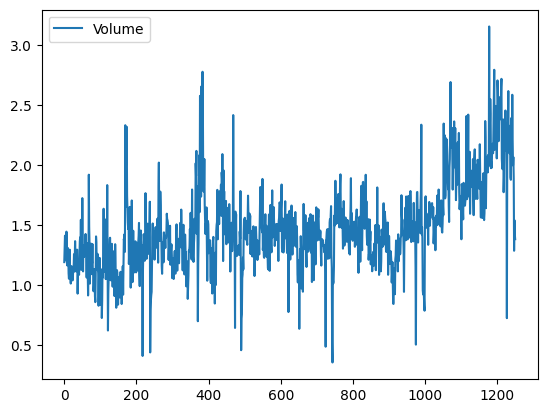

In [50]:
Smarket.plot(y="Volume")

# Logistic Regression

In [51]:
allvars = Smarket.columns.drop(["Today", "Direction", "Year"])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == "Up"
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [52]:
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [53]:
labels = np.array(["Down"] * 1250)
labels[probs>0.5] = "Up"
labels[:20]

array(['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down'],
      dtype='<U4')

In [54]:
confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [55]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_train

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
...,...,...,...,...,...,...,...,...,...
993,2004,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,Down
994,2004,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,Up
995,2004,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,Down
996,2004,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,Up


In [56]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())

results = glm_train.fit()
probs = results.predict(exog=X_test)

In [57]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]
labels = np.array(["Down"] * 252)
labels[probs > 0.5] = "Up"
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [58]:
np.mean(labels != L_test)

0.5198412698412699

In [59]:
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down'] * 252)
labels[probs>0.5] = "Up"
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


# LDA

In [60]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=['intercept']) for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [61]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [62]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


# QDA

In [63]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)
pred = qda.predict(X_test)
confusion_table(pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


# Naive Bayes

In [64]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [65]:
L_train

0        Up
1        Up
2      Down
3        Up
4        Up
       ... 
993    Down
994      Up
995    Down
996      Up
997    Down
Name: Direction, Length: 998, dtype: object

In [66]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


# KNN

In [67]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)
X_test

,Lag1,Lag2
998,-0.134,0.008
999,-0.812,-0.134
1000,-1.167,-0.812
1001,-0.363,-1.167
1002,0.351,-0.363
...,...,...
1245,0.422,0.252
1246,0.043,0.422
1247,-0.955,0.043
1248,0.130,-0.955


In [68]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

0.5317460317460317

KNN doesn't perform well on the Smarket dataset, as there is a very small relationship between the parameters, leading to an unclear classification boundary

KNN may work better on the dataset `Caravan`

In [69]:
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [70]:
feature_df = Caravan.drop(columns=['Purchase'])
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)
feature_std = pd.DataFrame(X_std, columns=feature_df.columns)

In [71]:
(X_train, X_test, y_train, y_test) = train_test_split(feature_std, Purchase, test_size=1000, random_state=0)
X_test

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
840,0.213820,-0.27258,-2.125697,2.466192,0.079251,-0.694311,0.217444,-1.051594,0.464159,-1.667319,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.150620,-0.087348,-0.118816
3338,0.525211,-0.27258,1.672893,-1.216964,0.429328,-0.694311,2.548861,-1.051594,-2.039739,-0.619824,...,-0.20291,-0.073165,-0.081055,-0.05992,-1.014358,-0.022706,-0.07365,-0.150620,-0.087348,-0.118816
2976,-1.187437,-0.27258,0.406697,-1.216964,-0.970980,-0.694311,-0.365410,0.914172,0.464159,0.951417,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.150620,-0.087348,-0.118816
5114,-1.187437,-0.27258,0.406697,-1.216964,-0.970980,0.302552,-0.365410,0.914172,-0.161816,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,-1.014358,-0.022706,-0.07365,-0.150620,-0.087348,-0.118816
527,0.525211,-0.27258,-0.859500,0.010755,0.429328,2.296276,0.217444,-1.051594,-0.787790,1.475164,...,-0.20291,-0.073165,-0.081055,-0.05992,-1.014358,-0.022706,-0.07365,-0.150620,-0.087348,-0.118816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,-1.810219,-0.27258,-0.859500,1.238473,-1.671134,-0.694311,0.217444,0.914172,-0.787790,1.475164,...,-0.20291,-0.073165,-0.081055,-0.05992,-1.014358,-0.022706,-0.07365,-0.150620,-0.087348,-0.118816
582,-1.732371,-0.27258,0.406697,0.010755,-1.671134,0.302552,0.800298,-0.068711,-0.787790,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,-1.014358,-0.022706,-0.07365,4.589446,-0.087348,-0.118816
873,0.603059,-0.27258,-0.859500,1.238473,0.429328,1.299414,0.800298,-1.051594,-1.413765,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.150620,-0.087348,-0.118816
480,0.603059,-0.27258,-0.859500,0.010755,0.429328,-0.694311,0.217444,-0.068711,-0.161816,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,-1.014358,-0.022706,-0.07365,-0.150620,-0.087348,-0.118816


In [72]:
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")

(0.111, 0.067)

In [73]:
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


## tuning parameters
the number of neightbors is a *tuning parameter*
this means that we don't know the optimal number beforehand

a forloop can be used to find the optimal value

In [74]:
for K in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes', 'Yes']
    print(f"K={K:d}: predicted rents: {pred: >2}, did rent: {did_rent:d}, accuracy: {did_rent/pred:.1%}")

K=1: predicted rents: 62, did rent: 9, accuracy: 14.5%
K=2: predicted rents:  6, did rent: 1, accuracy: 16.7%
K=3: predicted rents: 20, did rent: 3, accuracy: 15.0%
K=4: predicted rents:  4, did rent: 0, accuracy: 0.0%
K=5: predicted rents:  7, did rent: 1, accuracy: 14.3%


In [75]:
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 0.5, 'Yes', "No")
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


In [76]:
logit_labels = np.where(logit_pred[:, 1] > 0.25, 'Yes', "No")
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [77]:
# code to find the best value for probability cutoff
def get_accuracy(cutoff):
    logit_labels = np.where(logit_pred[:, 1] > cutoff, "Yes", "No")
    C = confusion_table(logit_labels, y_test)
    total_yes = C.loc["Yes"].sum()
    correct_yes = C.loc["Yes", "Yes"]
    accuracy = (correct_yes / total_yes) if total_yes > 0 else 0
    return accuracy

def find_current_max_accuracy(max_acc=0, max_val=0, delta=0.1, start=0, end=1):
    if delta == 0.01:
        return max_acc, max_val
        
    curr = start
    max_val = max_accuracy = 0
    while curr <= end:
        accuracy = get_accuracy(curr)
        print(f'p={curr:5f}, acc: {accuracy}')
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_val = curr
        
        curr += delta

    max_accuracy, max_val = find_current_max_accuracy(max_accuracy, max_val, delta/10, max_val-delta, max_val + delta)
    return max_accuracy, max_val

max_acc, max_val = find_current_max_accuracy()
print(f"max: p={max_val}, acc={max_acc}")


p=0.000000, acc: 0.067
p=0.100000, acc: 0.20121951219512196
p=0.200000, acc: 0.26666666666666666
p=0.300000, acc: 0.35714285714285715
p=0.400000, acc: 0.5
p=0.500000, acc: 0.0
p=0.600000, acc: 0.0
p=0.700000, acc: 0.0
p=0.800000, acc: 0.0
p=0.900000, acc: 0.0
p=1.000000, acc: 0
max: p=0.4, acc=0.5


# Linear and Poisson Regression

In [78]:
Bike = load_data("Bikeshare")

In [79]:
X = MS(['mnth', 'hr', 'workingday', 'temp', 'weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M_lm = sm.OLS(Y, X).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [80]:
hr_encode = contrast("hr", "sum")
mnth_encode = contrast("mnth", "sum")

X2 = MS([mnth_encode, hr_encode, 'workingday', 'temp', 'weathersit']).fit_transform(Bike)
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
S2

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [81]:
M2_lm.fittedvalues, M_lm.fittedvalues

(0       -30.901456
 1       -48.624910
 2       -55.624782
 3       -62.042212
 4       -67.808961
            ...    
 8640    230.109717
 8641    169.403071
 8642    128.263439
 8643     96.688170
 8644     61.258905
 Length: 8645, dtype: float64,
 0       -30.901456
 1       -48.624910
 2       -55.624782
 3       -62.042212
 4       -67.808961
            ...    
 8640    230.109717
 8641    169.403071
 8642    128.263439
 8643     96.688170
 8644     61.258905
 Length: 8645, dtype: float64)

In [82]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index=['mnth[Dec]'])])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64

Text(0, 0.5, 'Coefficient')

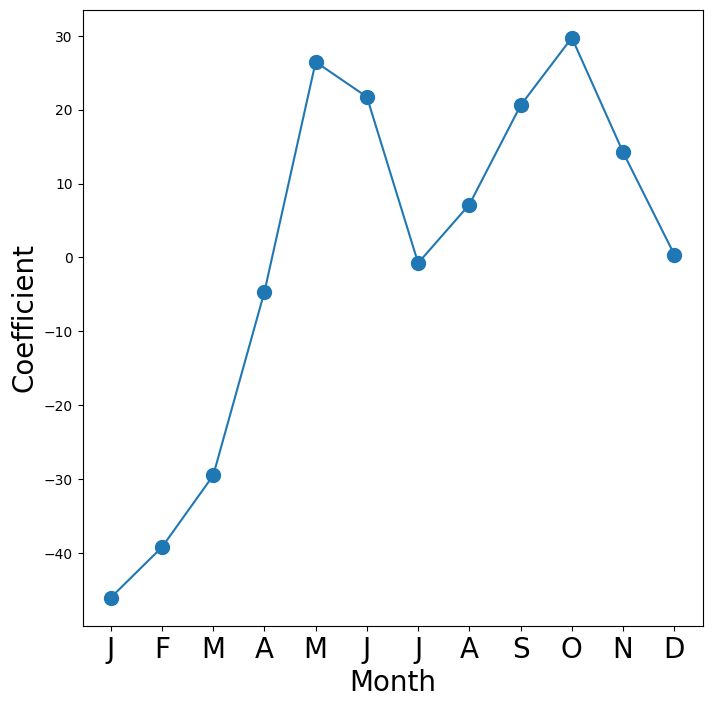

In [83]:
fig_month, ax_month = subplots(figsize=(8,8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)

ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20)

now we use poisson regression

In [84]:
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()
S_pois = summarize(M_pois)
S_pois

,coef,std err,z,P>|z|
intercept,4.1182,0.006,683.963,0.0
mnth[Jan],-0.6702,0.006,-113.445,0.0
mnth[Feb],-0.4441,0.005,-91.379,0.0
mnth[March],-0.2937,0.004,-70.886,0.0
mnth[April],0.0215,0.003,6.888,0.0
mnth[May],0.2405,0.003,82.462,0.0
mnth[June],0.2232,0.004,62.818,0.0
mnth[July],0.1036,0.004,25.121,0.0
mnth[Aug],0.1512,0.004,41.281,0.0
mnth[Sept],0.2335,0.003,75.281,0.0
